<div style="border-radius:10px;
            border : black solid;
            background-color: black;
            font-size:100%;
            text-align: left">
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:cyan'><center> Custmer Churn </center></h2> 


    


<img src ='https://daxg39y63pxwu.cloudfront.net/images/blog/churn-models/Customer_Churn_Prediction_Models_in_Machine_Learning.png' width=900 >


# About Dataset


Summary about the features and their types in the dataset:
- 1) RowNumber : Serial number
- 2) CustomerId :Unique Ids for bank customer identification
- 3) Surname : Customer's last name
- 4) CreditScore : Credit score of the customer
- 5) Geography : The country from which the customer belongs
- 6) Gender : Male or Female
- 7) Age : The age of the customer
- 8) Tenure : Number of years for which the customer has been with the bank
- 9) Balance : Bank balance of the customer
- 10) NumOfProducts : Number of bank products the customer is utilising
- 11) HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not
- 12) IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not
- 13) EstimatedSalary : Estimated salary of the customer in Dollars
- 14) Exited : Binary values; 1 if the customer closed account with bank and 0 if not exited



# <h2 style='; font-weight: bold; font-size:300%; color:blue'><center> ✏️✏️Purpose of the Project ✏️✏️</center></h2>  

### - Exploratory data analysis (EDA) is one of the most significant methods to examine the data we have. In this project, we are going to explore the hidden patterns in the dataset and extract information from them. 


# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **Necessary Sklean Libraries**

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve , auc
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# **Loading and Reading Dataset**

In [3]:
dataset = 'Churn_Modelling.csv'
df = pd.read_csv(dataset)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [4]:
drop_col =['RowNumber', 'CustomerId', 'Surname']
df = df.drop(drop_col, axis = 1)

In [5]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

'No duplicate entries'

# Exploring Dataset

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
#!pip install summarytools

In [10]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CreditScore[int64],Mean (sd) : 650.5 (96.7)min < med < max:350.0 < 652.0 < 850.0IQR (CV) : 134.0 (6.7),460 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACTElEQVR4nO3awYraQBzH8f/UVaJCggh68wUKPXj0IfqwfYQePPTsG3gTJURMNxhjelnYpdDFjEnzM34/12VgDl92zMzflWVpgIovbW8A+Oil7Q3AzDk3NLOB5/JzWZavde6nTQTZMufccDqdfg/DcOKz/ng8xs65H12JkiDbNwjDcLJarV6jKMqqLEySJFiv15PD4TAwM4LEuzuO3fB6vfajKIpns9lvj/VDjzWyCLIG9xy7eZ4HRVF8zbLsp5n5BNkpBFkP72N3u91ONpvN6HK59Jra3CMhyBpFUZRVPXbjOO7UkXsv7iEhhSAhhSAhhSAhhSAhhSAhhWufB1cURd/MQuecz3K5wQyCfGBpmvbzPP+2WCx6vV6v0oW8meZgBkE+sPP5/BIEwWi5XGbz+TyuslZ1MIMgP7h3QKLu/dxqPB5XfiF6I/dKRJBvGJDQQJDvGJAQQJB/YUCiXdxDQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQkrn3rIfdYSsDYrT5p0KkhGy26lOm3cqSGOE7Gaq0+ZdC9LMGCGrQm3anI8aSCFISCFISCFISCFISCFISOnktQ+a19QrD0GisiZfeQgSlTX5ykOQ8NbEKw8fNZBCkJAieWQz0/i85IJkpvG5yQVpzDQ+NcUgzYyZxmfFRw2kECSkECSkECSkECSkNPaVzeU2fDQSJJfb8NXUf0gut+Gl0YtxLrdR1adB8jsQ/9s/g6zjd+B+v/9Vde3pdArMzNI0DXa73Yi13VqbJEnw2d//AGeTjABjCH0ZAAAAAElFTkSuQmCC"">",0(0.0%)
2,Geography[object],1. France2. Germany3. Spain,"5,014 (50.1%)2,509 (25.1%)2,477 (24.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3b3YnbUBSF0aMghsyLhDG4GBeRYlOEujHG9yEzzIvykAbmj60rZa0KDubDRsJ7WNe1IOHH1gfw/xiq6rmqnrY+ZIfe1nV92fqIPRnP5/OvaZpOWx+yN621+zAMvwX3fuM0Tafr9foyz/Pr1sfsxePx+Lksy+l2uz1Vldjeaayqmuf59XK5/Nn6mJ153vqAvfGAQIzYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Yserf/7O2PmRPfF6fM7bW7suynMr/sz6ktXavqret79gTG4TPs0H4oMGUj5Tev9l8exxI1+sqC6Zj6XZdZcF0PL2vqzwhH4iXusSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiI6XZd1eNNfE3X6yoLpmOxQSDGuooYDwjE9Pwz6if0YLqd8pnxHU+XUz4zvmPqecrX3asYvsYDAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiupzy9XYP36PbKZ8Z3/HYIBBjykfMX0q8o0qM0LSXAAAAAElFTkSuQmCC"">",0(0.0%)
3,Gender[object],1. Male2. Female,"5,457 (54.6%)4,543 (45.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBJy1YM/nJuPes4GMuhgQ/V0oxQMGZ2d3Mbr0PuZhXKeXR+4iz8eM4foQQht6HXEnOeXXOfRLcXz6EMMzz/IgxPnsfcwXbtr2nlIZlWW5mRmy/eDOzGONzmqav3sdcyL33AWf01vsA/B/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIeLOfD/56H3IVPMs6n3NeU0qD8cFfMznn1cxeve84GwYvx2DwssMx5YMKb7Y63k6NMeWrYI7XHlO+HczxjsGUr45f543xpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskGHKt4PncQymfBXM8dpj8FLH4KWxbwpbat/D6U2YAAAAAElFTkSuQmCC"">",0(0.0%)
4,Age[int64],Mean (sd) : 38.9 (10.5)min < med < max:18.0 < 37.0 < 92.0IQR (CV) : 12.0 (3.7),70 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcElEQVR4nO3cvW4aQRSG4TMBnAWUBYQDHS1FpBSUNLmDXGzadCmgpOEOaBAS4kdsWLPApnGUKHJMdlnYD/I+/VhTvMY+9sy4OI4NUPEm7w0AvyvmvYGXOOfKZvaQcvkujuNtlvvB9cgF6ZwrN5vNz77vN9KsX6/XC+fcF6K8TXJBmtmD7/uNfr+/rdVqYZKFq9XKGwwGjfl8/mBmBHmDFIM0M7NarRa2Wq3vKZaWM98MroahBlIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIIElIudsnrjLvV/vF4LGW9H9yGiwR5zt3qKIq8w+HwIQzDb2aW5tYhbtilPiFT362eTCaN8Xhc2e/3hQvtDcIuei87zd3qxWLBver/GEMNpBAkpMg+pZLW4XAomZnvnEuznJfTcnZXQQZBUIqi6GOn0ykUCoVEw5QZL6cpuKsgd7td0fO8Sq/XC9vt9iLJWl5O03BXQf5UrVZ5Oe1GMdRACkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCyl2e9kmLw735I8hnHO7VQJDPONyrgSD/wOHefL0aJM+h4Nr+GiTPoSTDQJSN1z4heQ7lHzEQZefk75A8h3IaA1F2GGoyxEB0Pv5TAykECSn8yBbAhP4LQebs3Al9uVxunHNfzSzxWhOMmSBzds6EPp1O3w2Hw0+dTufxXv7cdDLI1WrlJf2im83GMzMLgsCbzWYV1p5em0YURUXP8yrdbtfV6/WnJGu32+3b0Wj0fj6fPzrn1mn3kNJTHMcvfgP9AAsrS+uRq78XAAAAAElFTkSuQm

## Checking null values

<Axes: >

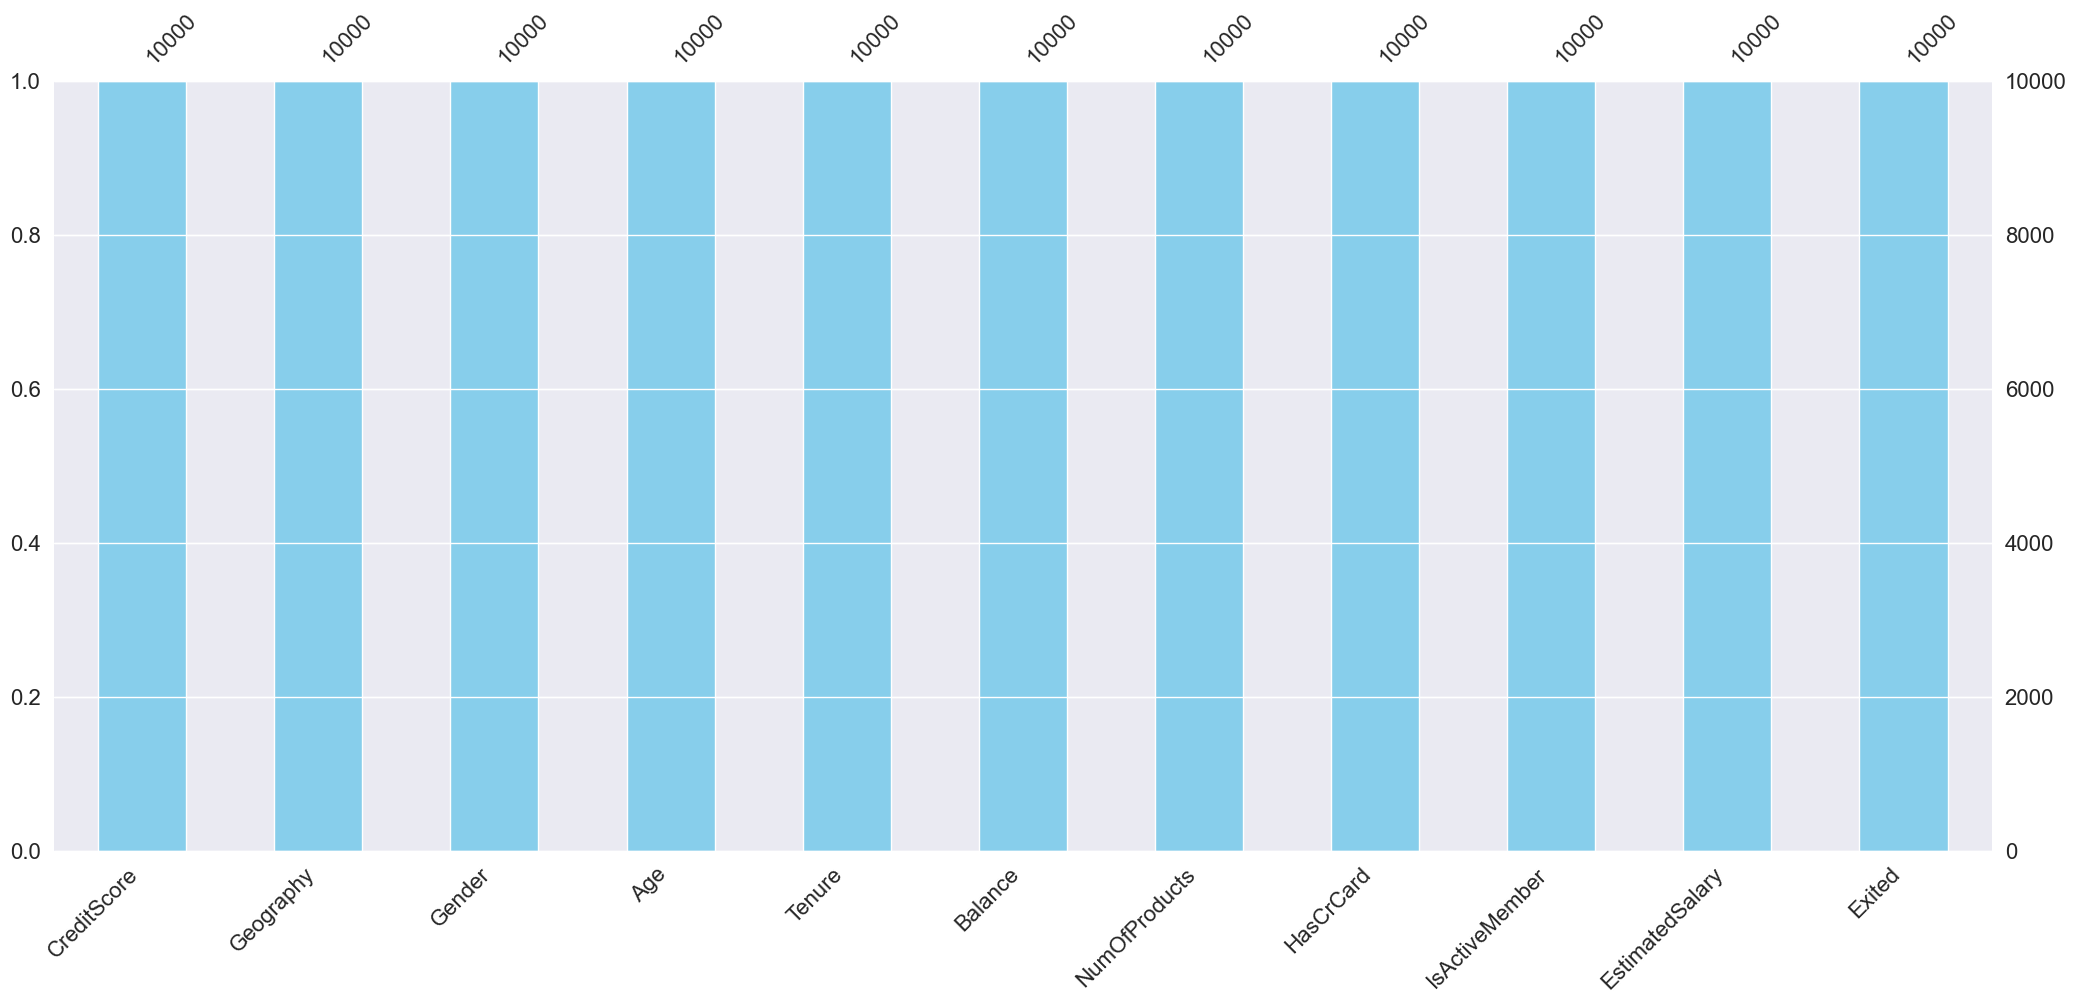

In [9]:
import missingno as msn
msn.bar(df, color= 'skyblue')
plt.title('Non-null Value of each feature')

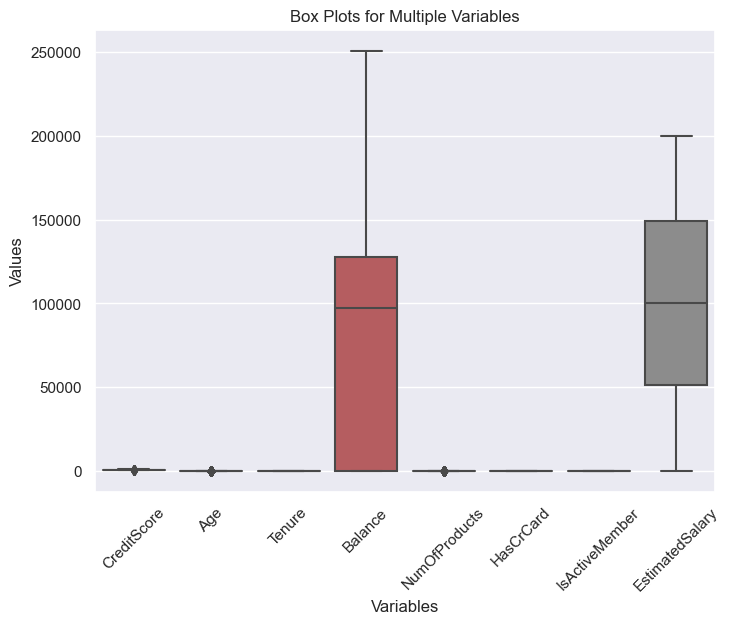

In [10]:

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create box plots for each column in the DataFrame

sns.boxplot(data=df.iloc[:,:-1])

# Customize the plot with labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots for Multiple Variables')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# **Descriptive Statistics**

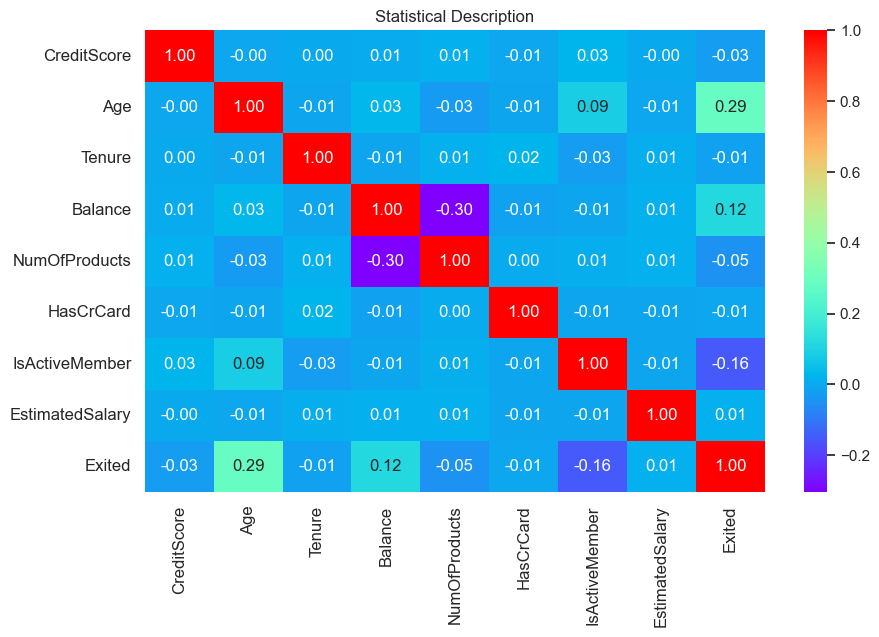

In [14]:
desc= df.select_dtypes(include='number').corr().T
def descriptive_stats(df):
    

    plt.figure(figsize=(10,6))
    sns.heatmap(df, annot=True, cmap='rainbow', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()


descriptive_stats(desc)

In [16]:
#!pip install dtale

In [15]:
import dtale
dtale.show(df)

                     Total no. of Unique Values
Gender                2
HasCrCard             2
IsActiveMember        2
Geography             3
NumOfProducts         4
Tenure               11
Age                  70
CreditScore         460
Balance            6382
EstimatedSalary    9999
dtype: int64


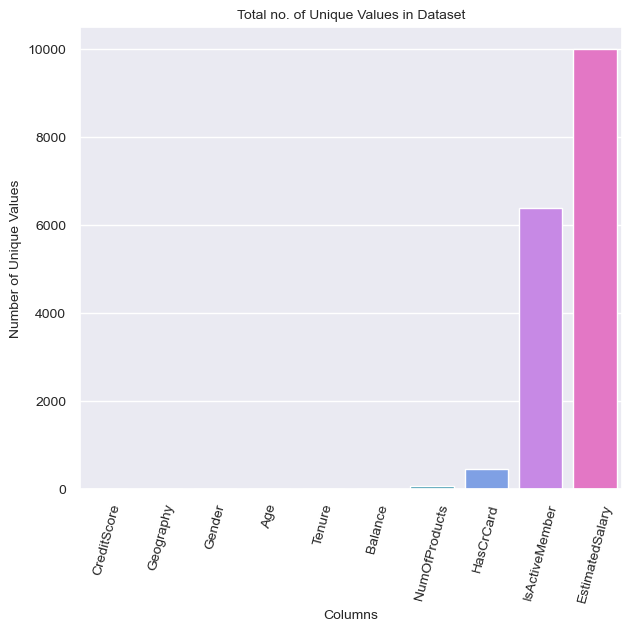

In [16]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts.sort_values())
    print('=='*30)
# Create a bar plot or count plot of unique values
    plt.figure(figsize=(7, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.sort_values(),palette='husl' )

    plt.xticks(rotation=75, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()


check_unquie_count(df.iloc[:,:-1])

# **Checking Imbalance between two classes**

Values and no of values in target feature
 Exited
0    7963
1    2037
Name: count, dtype: int64
The imbalance between classes found


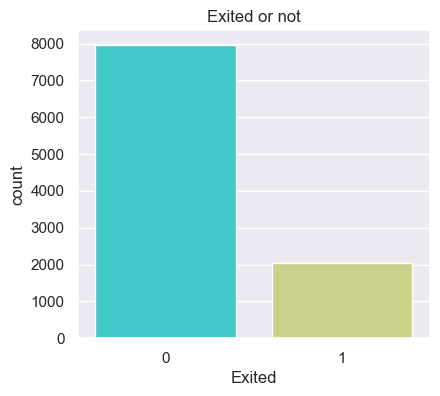

<Axes: ylabel='count'>

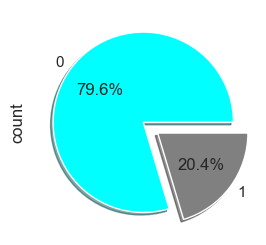

In [17]:
target =df['Exited']
vc = target.value_counts()
print('Values and no of values in target feature\n' ,vc)
if vc.values[0] > vc.values[1] :
    if vc.values[0] > 2*vc.values[1]:
        print('The imbalance between classes found')
    else:
        print('No or littel imbalancy found')
elif vc.values[0] < vc.values[1]:
    if vc.values[0] < 2*vc.values[1]: 
        print('The imbalance between classes found') 
    else:
          print('No or littel imbalancy found')
else:
      print('No or littel imbalancy found')
        

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ax = sns.countplot(x= target , data= df, palette ='rainbow')
ax.set_title('Exited or not')
plt.show()
plt.subplot(1,2,1)
df.Exited.value_counts().plot(kind = 'pie',
                              explode=[0,0.2], 
                             autopct='%1.1f%%',
                             shadow= True,
                             colors=['cyan', 'gray'])        

## Here 0 and 1 corresponds to not-exited and exited respectively.



### </h2><center> **# majority class $\geq$ 2 $\times$ # minority class** </center> </h2>
# </h2><center> >>**Imbalancy in dataset found**<< </center> </h2>


In [18]:
col_list=list(df)
col_list

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

<Axes: >

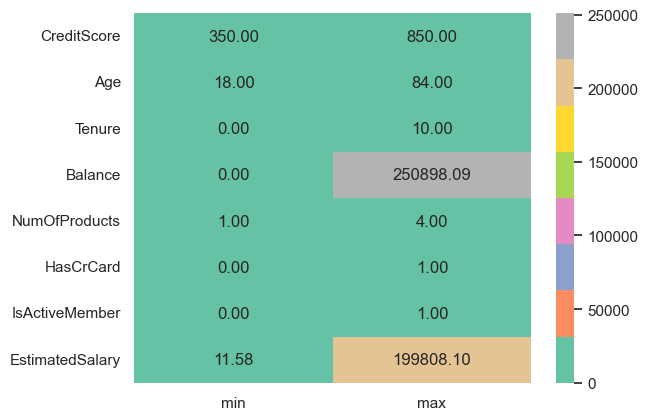

In [19]:
churn = df[df.Exited == 1][list(df.iloc[:,:-1])].describe().T[['min','max']]
sns.heatmap(churn, annot=True, cmap='Set2', fmt=".2f")

# Distributions

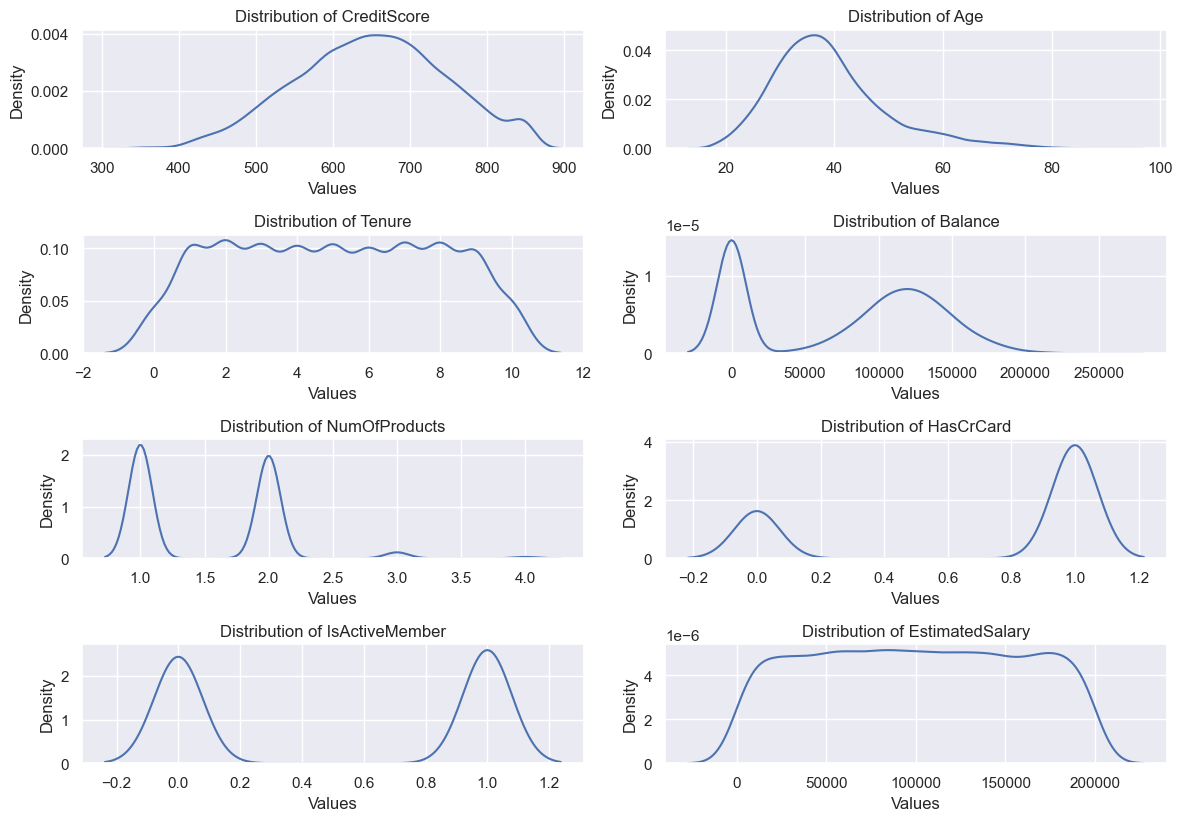

In [20]:
num_cols = len(df.columns)

# Determine the number of rows and columns for the subplot grid
num_rows = (num_cols + 1) // 2
num_cols_subplot = 2

# Set the figure size for the plot
plt.figure(figsize=(12, 12))

# Create subplots for each column's distribution
for i, column in enumerate(df.iloc[:,:-1].select_dtypes(exclude=['object']).columns):
    plt.subplot(num_rows, num_cols_subplot, i + 1)
    sns.distplot(df[column], bins = 50, kde = True,hist=False)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

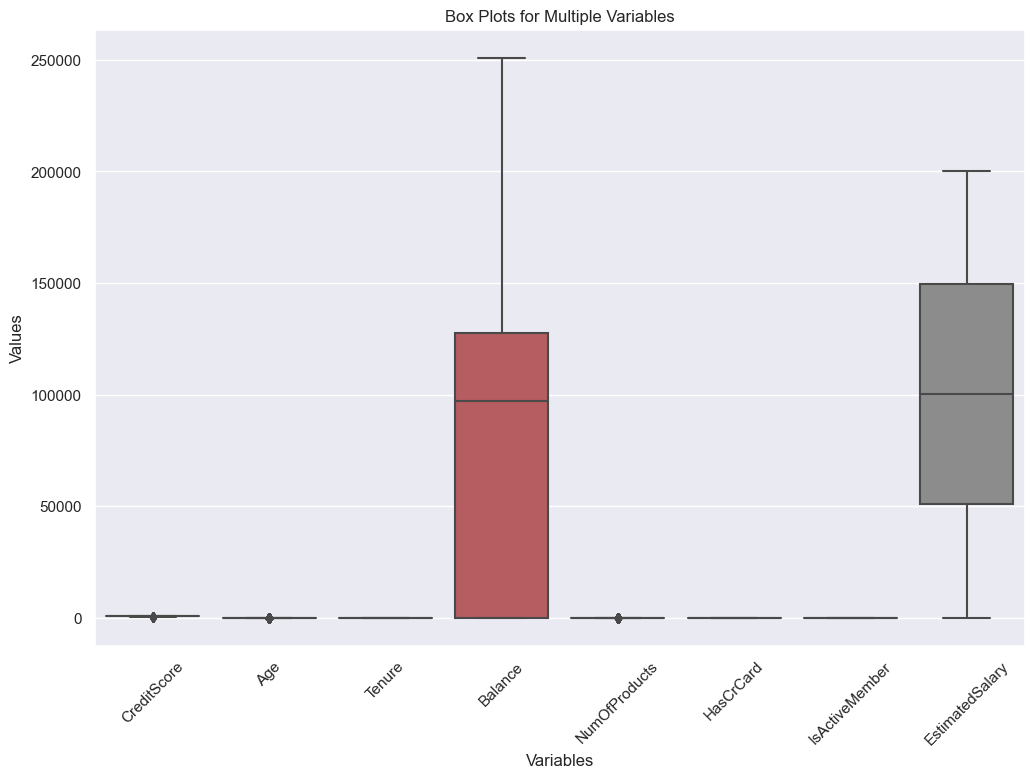

In [21]:

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create box plots for each column in the DataFrame

sns.boxplot(data=df.iloc[:,:-1].select_dtypes(exclude=['object']))

# Customize the plot with labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots for Multiple Variables')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='Geography', ylabel='count'>

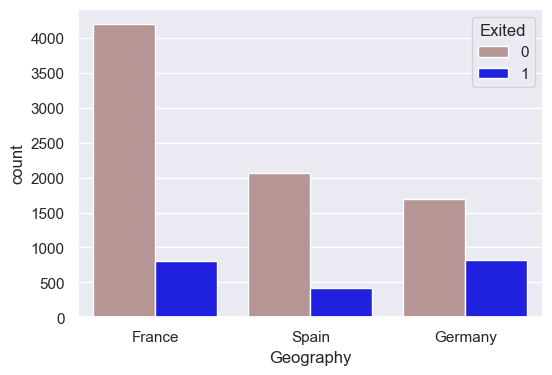

In [83]:
#sns.countplot(data= df, x= 'Geography', palette =['violet', 'slateblue', 'midnightblue'])
plt.figure(figsize = (6,4))
sns.countplot(data= df, x= 'Geography', palette =['rosybrown', 'blue','green'], hue ='Exited')


<Axes: xlabel='Gender', ylabel='count'>

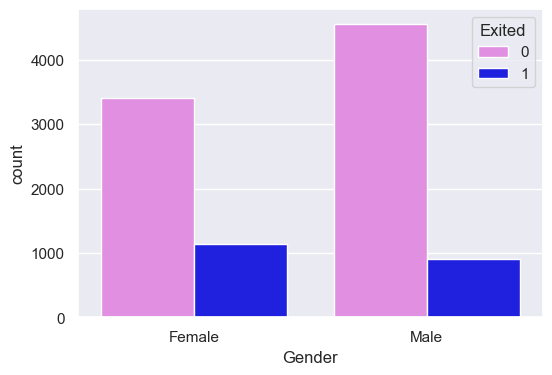

In [84]:
plt.figure(figsize = (6,4))

sns.countplot(data= df, x= 'Gender', palette =['violet', 'blue'], hue = 'Exited')


<Axes: xlabel='Gender', ylabel='count'>

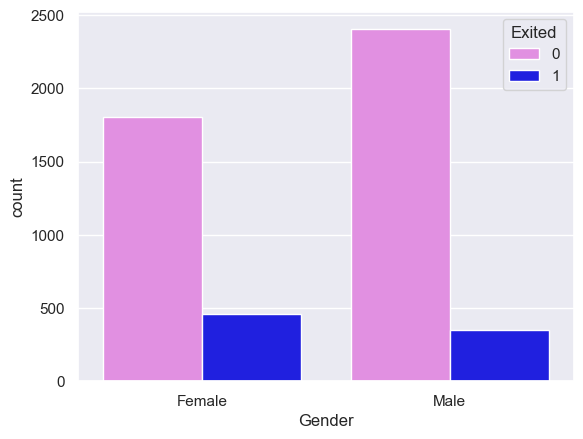

In [85]:
sns.countplot(data= df[(df.Geography =='France')], x= 'Gender', palette =['violet', 'blue'], hue = 'Exited')

Text(0.5, 1.0, 'Germany')

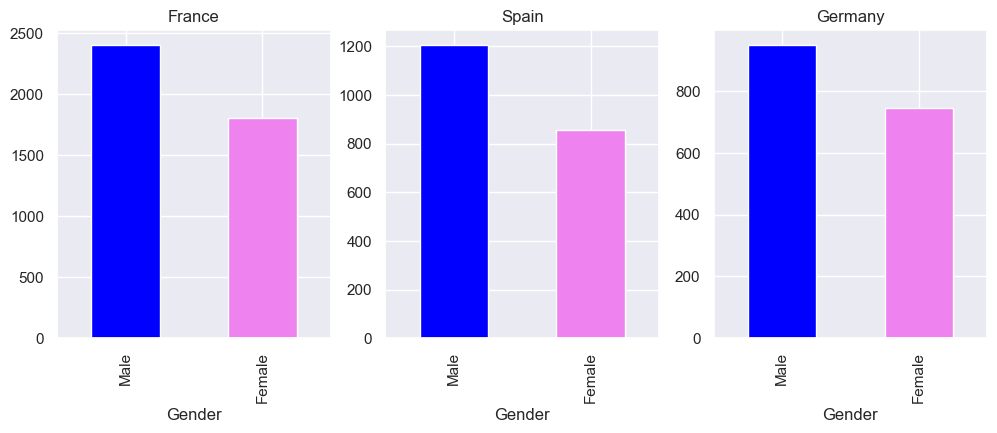

In [87]:
plt.figure(figsize = (12,4))
plt.subplot(131)
df[(df.Exited==0) & (df.Geography =='France')]['Gender'].value_counts().plot(kind='bar', color = ['blue', 'violet'])
plt.title('France')
plt.subplot(132)
df[(df.Exited==0) & (df.Geography =='Spain')]['Gender'].value_counts().plot(kind='bar', color = ['blue', 'violet'])
plt.title('Spain')
plt.subplot(133)
df[(df.Exited==0) & (df.Geography =='Germany')]['Gender'].value_counts().plot(kind='bar', color = ['blue', 'violet'])
plt.title('Germany')

In [ ]:
g = sns.PairGrid(df, hue='Exited',palette ='Set1' , diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()

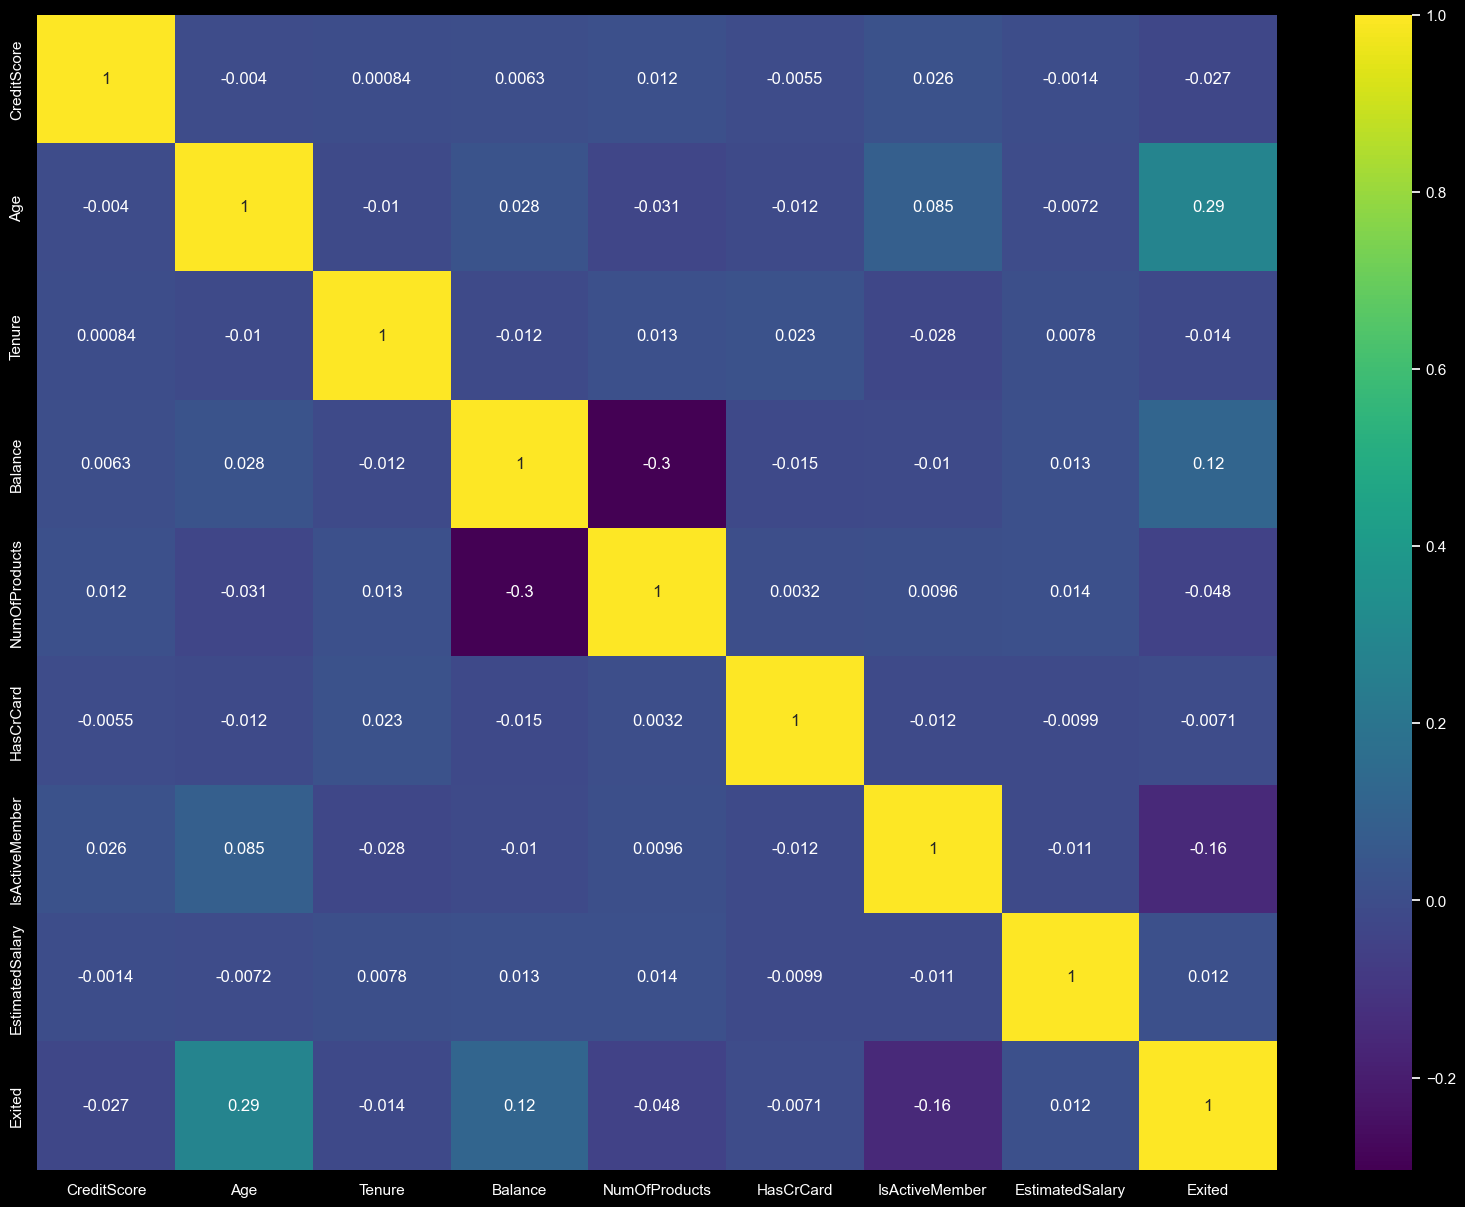

In [22]:
# Finding correlation
plt.style.use('dark_background')
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

<Axes: >

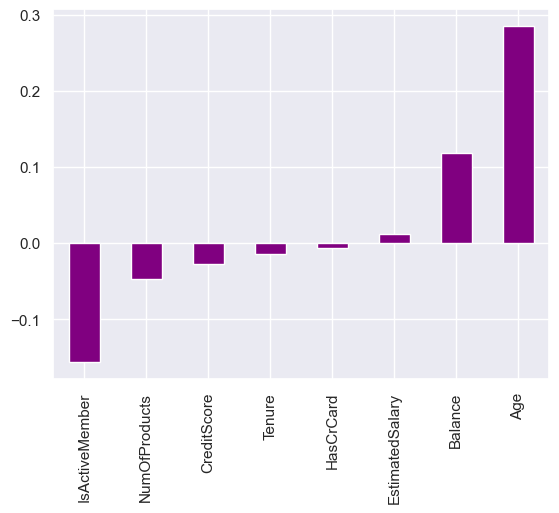

In [37]:
df.select_dtypes(include='number').corr()['Exited'].sort_values().head(8).plot(kind='bar', color ='purple')

In [88]:
target = "Exited"
x = df.drop(columns=target)
y = df[target]

In [89]:
cat_col =['Geography','Gender',]
for col in cat_col:
    x[col].astype('category')

label_encoder = LabelEncoder()
x['Gender'] = label_encoder.fit_transform(x['Gender'])


x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


In [90]:
x = pd.get_dummies(x, columns = ['Geography'],drop_first = True)

x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,True,False


In [91]:
sc = StandardScaler()
sc_x = pd.DataFrame(sc.fit_transform(x) , columns=x.columns)
sc_x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740


In [92]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### **Imbalance treatment**

In [93]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(sc_x,y)

### **Spliting into Train and Test**

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=123,  stratify = y_over)

print('x_train :', x_train.shape,'\nx_test  :', x_test.shape, 
      '\ny_train :', y_train.shape,'\ny_test  :', y_test.shape)

x_train : (11944, 11) 
x_test  : (3982, 11) 
y_train : (11944,) 
y_test  : (3982,)


In [95]:
logit = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
gbc = GradientBoostingClassifier()
nbc = GaussianNB()




LogisticRegression
------------------------------
▬ Training Accuracy(CrossValidation), 71.0 %
▬ TestAccuracy(CrossValidation), 70.0 %
Variance (CrossValidation) : 2.0

------------------------------
LogisticRegression
------------------------------

Test confusion matrix :
 [[1403  588]
 [ 627 1364]]

Test ROC-AUC : 0.69


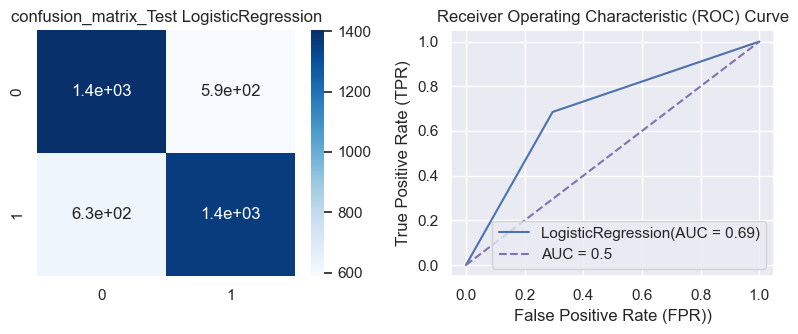

DecisionTreeClassifier
------------------------------
▬ Training Accuracy(CrossValidation), 90.0 %
▬ TestAccuracy(CrossValidation), 80.0 %
Variance (CrossValidation) : 10.0
ATTENTION : The  DecisionTreeClassifier Model is overfitting

------------------------------
DecisionTreeClassifier
------------------------------

Test confusion matrix :
 [[1700  291]
 [  39 1952]]

Test ROC-AUC : 0.92


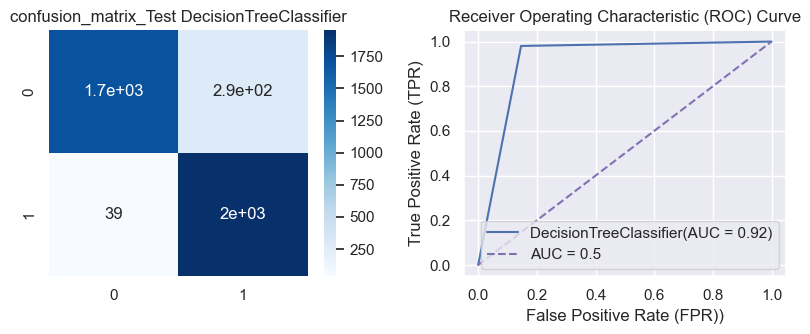

RandomForestClassifier
------------------------------
▬ Training Accuracy(CrossValidation), 94.0 %
▬ TestAccuracy(CrossValidation), 86.0 %
Variance (CrossValidation) : 8.0

------------------------------
RandomForestClassifier
------------------------------

Test confusion matrix :
 [[1823  168]
 [  31 1960]]

Test ROC-AUC : 0.95


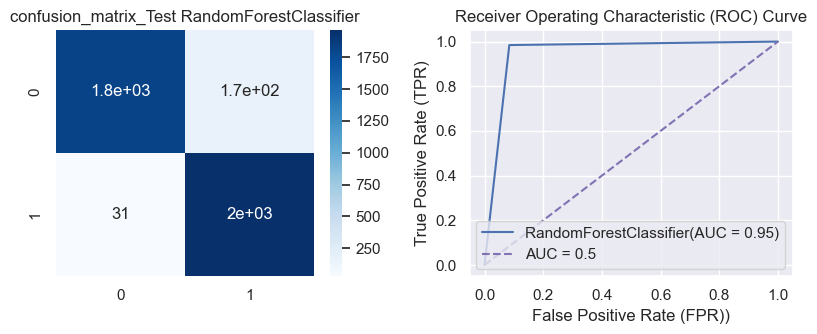

KNeighborsClassifier
------------------------------
▬ Training Accuracy(CrossValidation), 80.0 %
▬ TestAccuracy(CrossValidation), 74.0 %
Variance (CrossValidation) : 6.0

------------------------------
KNeighborsClassifier
------------------------------

Test confusion matrix :
 [[1457  534]
 [ 267 1724]]

Test ROC-AUC : 0.80


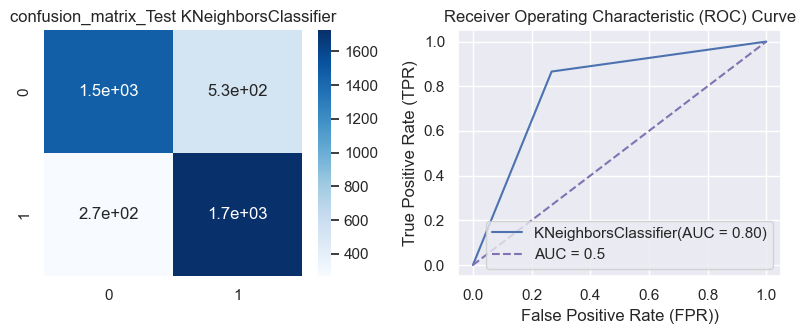

SupportVectorClassifier
------------------------------
▬ Training Accuracy(CrossValidation), 80.0 %
▬ TestAccuracy(CrossValidation), 79.0 %
Variance (CrossValidation) : 1.0

------------------------------
SupportVectorClassifier
------------------------------

Test confusion matrix :
 [[1603  388]
 [ 435 1556]]

Test ROC-AUC : 0.79


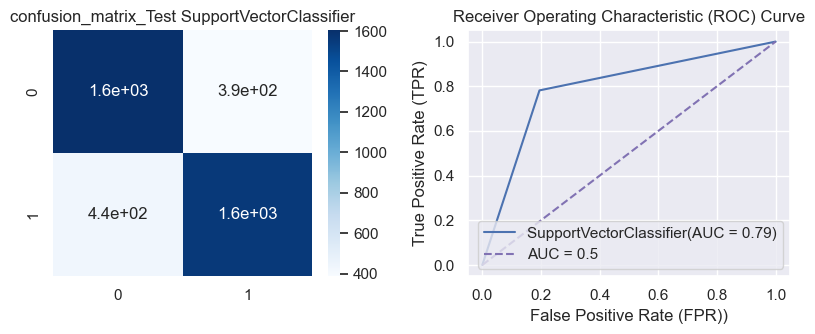

In [99]:
estimators = [('LogisticRegression', logit), 
          ('DecisionTreeClassifier', dtc), 
          ('RandomForestClassifier',rfc), 
          ('KNeighborsClassifier',knn),
          ('SupportVectorClassifier',svm) 
        ]

for model_name, model in estimators:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
#=======================================================
#            Cross Validation
#--------------------------------------------------------
    CV_train_acc =cross_val_score(model, x_train, y_train, cv =10).mean()
    CV_test_acc =cross_val_score(model, x_test, y_test, cv =10).mean()
    print(model_name)
    print('--'*15)

    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc.round(2)*100} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc.round(2)*100} %' )
    variance_CV = abs(CV_train_acc - CV_test_acc).round(2)*100
    print(f'Variance (CrossValidation) : {variance_CV}')
    if (variance_CV > 9) or (CV_train_acc > 99):
        print(f'ATTENTION : The  {model_name} Model is overfitting')
        
        
    print()
    cm_test = confusion_matrix(y_test, y_pred_test)

    #y_test_binary = (y_test == 1).astype(int)
    #y_pred_test_binary = (y_pred_test == 1).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)  
    roc_auc = auc(fpr, tpr)
    print('--'*15)
    print(model_name)
    print('--'*15) 

    print()
    print(f'Test confusion matrix :\n {cm_test}')
    print()
    print(f'Test ROC-AUC : {roc_auc:.2f}')
    
    plt.figure(figsize = (8,3.5))
    plt.subplot(1,2,1)
    sns.heatmap(cm_test, annot = True, cmap= 'Blues')
    plt.title(f'confusion_matrix_Test {model_name}')
   
    plt.subplot(1,2,2)   
    plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

    plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title

    plt.xlabel('False Positive Rate (FPR))')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
# Show the plot
    plt.show()